In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pytesseract
from PIL import Image

In [2]:
data=pd.read_csv('개별연구_altificial_simple_update.csv')
data

,place,blog,date,content,altificial_simple
0,바비레드 강남본점,바비레드 강남본점1,16시간 전,지난주에 친구 커플과 같이 더블데이트를 하기 위해 강남에서 모임을 가졌어요.\n양식...,1
1,바비레드 강남본점,바비레드 강남본점2,2022. 6. 2. 17:42,저번 주에 친한 친구와 함께 강남역 샐러드 집에 방문해서 신선한 식사를 하고 왔어요...,1
2,바비레드 강남본점,바비레드 강남본점3,2022. 5. 27. 22:54,지난주 친한 동생 생일을 맞아\n밥을 사주기로 약속을 잡았는데요.\n멋스러운 공간은...,1
3,바비레드 강남본점,바비레드 강남본점4,2022. 5. 27. 23:52,몇일 전 친구들이랑 같이 점심시간에 만났다가 강남역 샐러드 매장에 방문해 식사를 했...,1
4,바비레드 강남본점,바비레드 강남본점5,2022. 6. 22. 12:47,요즘 데이트시 강남역에서 식사하는 비중이\n80%는 되는 것 같네용\n원래는 cgv...,0
...,...,...,...,...,...
5715,한성칼국수 논현본점,한성칼국수 논현본점56,2022. 5. 14. 16:26,한성칼국수 본점에 다녀왔다.\n강남 노른자 땅 논현에 위치한 가게다.\n1983년부...,0
5716,한성칼국수 논현본점,한성칼국수 논현본점57,2022. 3. 16. 0:55,한성칼국수 논현본점 : 네이버\n방문자리뷰 445 · 블로그리뷰 453\nnaver...,0
5717,한성칼국수 논현본점,한성칼국수 논현본점58,2022. 3. 24. 8:22,50m\n© NAVER Corp.\n한성칼국수 논현본점\n서울특별시 강남구 언주로1...,0
5718,한성칼국수 논현본점,한성칼국수 논현본점59,2022. 6. 9. 21:42,평소에 소문이 자자했던 한성칼국수를 드디어 가봤다\n어르신들도 좋아할만한 재료와 풍...,0


In [53]:
#이 박스 바로 아래 박스의 코드를 실행하면 data_image 객체가 불러와집니다.

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe' 

data_image=pd.DataFrame(columns ={'blog','add_logo'})
curr_idx=0
import os
folder_list = os.listdir(r'C:\Users\ecopl\image_blog')
for blog in folder_list:
    image_list=os.listdir(r'C:\Users\ecopl\image_blog'+"/"+blog)
    string=''
    for image in image_list:
        a=Image.open(r"C:\Users\ecopl\image_blog"+"/"+blog+"/"+image)
        result=pytesseract.image_to_string(a, lang='kor')
        string=string+result
    if ('원고료'in string) | ('고료'in string) | ('소정의'in string) | ('금전적' in string) | ('업체로부터'in string) :
        data_image.loc[curr_idx]=[blog,'1']
    else:
        data_image.loc[curr_idx]=[blog,'0']
    curr_idx+=1
            
data_image           

,blog,add_logo
0,add_logo,1
1,BISTROT de YOUNTVILLE1,0
2,BISTROT de YOUNTVILLE10,0
3,BISTROT de YOUNTVILLE11,0
4,BISTROT de YOUNTVILLE12,0
...,...,...
5016,후추포인트6,0
5017,후추포인트60,0
5018,후추포인트7,0
5019,후추포인트8,0


In [3]:
#위 박스의 실행 시간이 매우 긴 관계로, 해당코드를 통해 data_image 데이터프레임을 불러오고 실행하시면 편하실 것 같습니다.
data_image=pd.read_csv("22summer_개별연구_광고로고선별(by블로그).csv")

In [4]:
data_image[data_image.add_logo=='1']

,blog,add_logo


In [5]:
data[data.blog=='갓잇 도산공원점5']

,place,blog,date,content,altificial_simple
5032,갓덴스시 강남점,갓잇 도산공원점5,2022. 5. 15. 22:29,도산공원 데이트 맛집\n갓잇 GOD EAT\n오늘의 포스팅은 도산공원 데이트하기 좋...,0


In [6]:
data.iloc[5032,4]=1
data[data.blog=='갓잇 도산공원점5']

,place,blog,date,content,altificial_simple
5032,갓덴스시 강남점,갓잇 도산공원점5,2022. 5. 15. 22:29,도산공원 데이트 맛집\n갓잇 GOD EAT\n오늘의 포스팅은 도산공원 데이트하기 좋...,1


In [7]:
data[data.blog=='너무한육회연어16']

,place,blog,date,content,altificial_simple
944,너무한육회연어,너무한육회연어16,2022. 3. 1. 16:19,이번 포스팅은 강남역 이자카야 연어 육회 모두 당길 때 가기 좋은\n제가 너무 좋아...,1


In [8]:
data[data.blog=='너무한육회연어21']

,place,blog,date,content,altificial_simple
949,너무한육회연어,너무한육회연어21,2021. 10. 4. 16:59,이번 포스팅은 강남역 밥집 무한리필 즐기기 좋은 너무한육회연어 후기입니다.\n진짜 ...,1


In [9]:
data[data.blog=='동경규동 강남점13']

,place,blog,date,content,altificial_simple
2029,동경규동 강남점,동경규동 강남점13,2022. 6. 12. 22:24,맛있는 거 완전 좋아해!\n기분이 안 좋을 때에는 강남역맛집 서치하는 맛으로 살아가...,0


In [10]:
data.iloc[2029,4]=1
data[data.blog=='동경규동 강남점13']

,place,blog,date,content,altificial_simple
2029,동경규동 강남점,동경규동 강남점13,2022. 6. 12. 22:24,맛있는 거 완전 좋아해!\n기분이 안 좋을 때에는 강남역맛집 서치하는 맛으로 살아가...,1


In [11]:
data[data.blog=='동경규동 강남점6']

,place,blog,date,content,altificial_simple
2024,동경규동 강남점,동경규동 강남점6,2022. 6. 10. 10:16,"강남역 근처에서 일하는 분들\n매일 가도 부담없는 가격,\n혼자 가도 편안한 분위기...",0


In [12]:
data.iloc[2024,4]=1
data[data.blog=='동경규동 강남점6']

,place,blog,date,content,altificial_simple
2024,동경규동 강남점,동경규동 강남점6,2022. 6. 10. 10:16,"강남역 근처에서 일하는 분들\n매일 가도 부담없는 가격,\n혼자 가도 편안한 분위기...",1


In [13]:
data[data.blog=='드롭탑 강남역점26']

,place,blog,date,content,altificial_simple
553,드롭탑 강남역점,드롭탑 강남역점26,2022. 5. 25. 16:35,강남역 노트북 하기 좋은 넓은 카페\n공부하기에도 좋은 드롭탑925\n안녕하세용 유...,0
663,드롭탑 강남역점,드롭탑 강남역점26,2022. 5. 26. 22:08,"드뎌 !!!\n저도 레디백 유저가 되었어여 ㅎㅎ\n이게 참 애증인게 ,,\n레디백 ...",0
1333,드롭탑 강남역점,드롭탑 강남역점26,2022. 5. 25. 16:35,강남역 노트북 하기 좋은 넓은 카페\n공부하기에도 좋은 드롭탑925\n안녕하세용 유...,0


In [14]:
#data.drop([1333],axis=0,inplace=True)
data.iloc[553,4]=1
data[data.blog=='드롭탑 강남역점26']

,place,blog,date,content,altificial_simple
553,드롭탑 강남역점,드롭탑 강남역점26,2022. 5. 25. 16:35,강남역 노트북 하기 좋은 넓은 카페\n공부하기에도 좋은 드롭탑925\n안녕하세용 유...,1
663,드롭탑 강남역점,드롭탑 강남역점26,2022. 5. 26. 22:08,"드뎌 !!!\n저도 레디백 유저가 되었어여 ㅎㅎ\n이게 참 애증인게 ,,\n레디백 ...",0
1333,드롭탑 강남역점,드롭탑 강남역점26,2022. 5. 25. 16:35,강남역 노트북 하기 좋은 넓은 카페\n공부하기에도 좋은 드롭탑925\n안녕하세용 유...,0


In [15]:
data[data.blog=='드롭탑 강남역점28']

,place,blog,date,content,altificial_simple
555,드롭탑 강남역점,드롭탑 강남역점28,2022. 1. 3. 21:33,기존 매장과 다르게 건강한 #프리미엄카페 로\n리브랜딩한 플래그십 스토어로 변신한 ...,0
665,드롭탑 강남역점,드롭탑 강남역점28,2022. 5. 28. 12:27,"남편한테 눈뜨자마자 ""지금 강남역카페 가야해!""\n라고 했는데 다행히 시간적으로 여...",0
1335,드롭탑 강남역점,드롭탑 강남역점28,2022. 1. 3. 21:33,기존 매장과 다르게 건강한 #프리미엄카페 로\n리브랜딩한 플래그십 스토어로 변신한 ...,0


In [16]:
#data.drop([1335],axis=0,inplace=True)
data.iloc[555,4]=1
data[data.blog=='드롭탑 강남역점28']

,place,blog,date,content,altificial_simple
555,드롭탑 강남역점,드롭탑 강남역점28,2022. 1. 3. 21:33,기존 매장과 다르게 건강한 #프리미엄카페 로\n리브랜딩한 플래그십 스토어로 변신한 ...,1
665,드롭탑 강남역점,드롭탑 강남역점28,2022. 5. 28. 12:27,"남편한테 눈뜨자마자 ""지금 강남역카페 가야해!""\n라고 했는데 다행히 시간적으로 여...",0
1335,드롭탑 강남역점,드롭탑 강남역점28,2022. 1. 3. 21:33,기존 매장과 다르게 건강한 #프리미엄카페 로\n리브랜딩한 플래그십 스토어로 변신한 ...,0


In [17]:
data[data.blog=='모스가든4']

,place,blog,date,content,altificial_simple
59,모스가든,모스가든4,2022. 5. 27. 16:00,하이루\n오늘은 회사 출근전에 회사에서 가까운곳에\n위치한 강남 논현동 애견동반카페...,1
984,모스가든,모스가든4,2022. 5. 27. 16:00,하이루\n오늘은 회사 출근전에 회사에서 가까운곳에\n위치한 강남 논현동 애견동반카페...,1


In [18]:
data[data.blog=='바비레드 강남본점56']

,place,blog,date,content,altificial_simple
50,바비레드 강남본점,바비레드 강남본점56,2022. 5. 11. 21:41,"안녕하세요, 바비레드 서포터즈 바비피플 EUNY입니다. 오늘도 바비레드에 다녀온 후...",0


In [19]:
data.iloc[50,4]=1
data[data.blog=='바비레드 강남본점56']

,place,blog,date,content,altificial_simple
50,바비레드 강남본점,바비레드 강남본점56,2022. 5. 11. 21:41,"안녕하세요, 바비레드 서포터즈 바비피플 EUNY입니다. 오늘도 바비레드에 다녀온 후...",1


In [20]:
data[data.blog=='봉구가래떡볶이 역삼점41']

,place,blog,date,content,altificial_simple
2723,봉구가래떡볶이 역삼점,봉구가래떡볶이 역삼점41,2022. 5. 27. 23:52,더 쫄깃한 가래떡 떡볶이\n전 메뉴가 다 맛난 곳이라\n개업 일주일만에 웨이팅\n가...,0


In [21]:
data.iloc[2723,4]=1
data[data.blog=='봉구가래떡볶이 역삼점41']

,place,blog,date,content,altificial_simple
2723,봉구가래떡볶이 역삼점,봉구가래떡볶이 역삼점41,2022. 5. 27. 23:52,더 쫄깃한 가래떡 떡볶이\n전 메뉴가 다 맛난 곳이라\n개업 일주일만에 웨이팅\n가...,1


In [22]:
data[data.blog=='삼육가 본점26']

,place,blog,date,content,altificial_simple
131,삼육가 본점,삼육가 본점26,2019. 5. 28. 12:43,신논현역 3번 출구\n봄비가 오던 월요일 저녁.\n지글지글 불판에 삼겹살 한 판이 ...,1
1061,삼육가 본점,삼육가 본점26,2020. 8. 14. 8:00,꽃삼겹으로 유명한 신논현 고깃집인 삼육가.\n여기도 여기저기서 체험단을 해서 굳이 ...,0
1522,삼육가 본점,삼육가 본점26,2020. 8. 14. 8:00,꽃삼겹으로 유명한 신논현 고깃집인 삼육가.\n여기도 여기저기서 체험단을 해서 굳이 ...,0


In [23]:
data[data.blog=='용용선생 강남역점5']

,place,blog,date,content,altificial_simple
4859,용용선생 강남역점,용용선생 강남역점5,2022. 5. 30. 18:18,하..\n또 결국 마지막 날이 되어서야\n행동하는 ㅋㅋㅋㅋ 게으른 나란~ 사람~\n...,1


In [24]:
data[data.blog=='지아니스나폴리 가로수길점31']

,place,blog,date,content,altificial_simple
307,지아니스나폴리 가로수길점,지아니스나폴리 가로수길점31,2021. 12. 17. 1:51,"안녕하세요, 무나&뎅이에요~\n이탈리안으로 워낙 유명하면서도 특히 런치피자 가성비가...",0
629,지아니스나폴리 가로수길점,지아니스나폴리 가로수길점31,2022. 2. 9. 8:20,"파스타와 피자에 꽂혀있는 요즘, 약속이 생기기만 하면 양식 맛집을 찾아보고 있는데요...",0
735,지아니스나폴리 가로수길점,지아니스나폴리 가로수길점31,2019. 11. 18. 14:07,비 오는 일요일 무려 3차를 달렸던 대학교 친구들과의 만남!\n정말 몇 개월 만의 ...,0
3725,지아니스나폴리 가로수길점,지아니스나폴리 가로수길점31,2022. 4. 10. 7:46,안녕하세요 해빵입니다🌞\n벚꽃이 피고 본격적으로 봄의 따뜻함이 찾아온\n지난주 토요...,0


In [25]:
data[data.blog=='지아니스나폴리 가로수길점51']

,place,blog,date,content,altificial_simple
745,지아니스나폴리 가로수길점,지아니스나폴리 가로수길점51,2022. 4. 10. 7:46,안녕하세요 해빵입니다🌞\n벚꽃이 피고 본격적으로 봄의 따뜻함이 찾아온\n지난주 토요...,0


In [26]:
data.iloc[745,4]=1
data[data.blog=='지아니스나폴리 가로수길점51']

,place,blog,date,content,altificial_simple
745,지아니스나폴리 가로수길점,지아니스나폴리 가로수길점51,2022. 4. 10. 7:46,안녕하세요 해빵입니다🌞\n벚꽃이 피고 본격적으로 봄의 따뜻함이 찾아온\n지난주 토요...,1


In [27]:
data[data.blog=='청담돈28']

,place,blog,date,content,altificial_simple
4817,청담돈,청담돈28,2022. 2. 28. 18:34,브레이크타임 없이\n오전 10시부터 오후 10시까지 운영하는 청담돈!\n식사 시간을...,0


In [28]:
data.iloc[4817,4]=1
data[data.blog=='청담돈28']

,place,blog,date,content,altificial_simple
4817,청담돈,청담돈28,2022. 2. 28. 18:34,브레이크타임 없이\n오전 10시부터 오후 10시까지 운영하는 청담돈!\n식사 시간을...,1


In [29]:
data[data.blog=='칙바이칙 선릉역점21']

,place,blog,date,content,altificial_simple
3461,칙바이칙 선릉역점,칙바이칙 선릉역점21,2022. 6. 15. 23:08,50m\n© NAVER Corp.\n칙바이칙 선릉역점\n서울특별시 강남구 선릉로 5...,1


In [30]:
data[data.blog=='칙바이칙 선릉역점3']

,place,blog,date,content,altificial_simple
3443,칙바이칙 선릉역점,칙바이칙 선릉역점3,2022. 6. 17. 10:07,"선릉역 근처는 회사가 많아서 점심시간이면 다들 여럿이서 가는 식당이 많기 때문인지,...",0


In [31]:
data.iloc[3443,4]=1
data[data.blog=='칙바이칙 선릉역점3']

,place,blog,date,content,altificial_simple
3443,칙바이칙 선릉역점,칙바이칙 선릉역점3,2022. 6. 17. 10:07,"선릉역 근처는 회사가 많아서 점심시간이면 다들 여럿이서 가는 식당이 많기 때문인지,...",1


In [32]:
data[data.altificial_simple==1]

,place,blog,date,content,altificial_simple
0,바비레드 강남본점,바비레드 강남본점1,16시간 전,지난주에 친구 커플과 같이 더블데이트를 하기 위해 강남에서 모임을 가졌어요.\n양식...,1
1,바비레드 강남본점,바비레드 강남본점2,2022. 6. 2. 17:42,저번 주에 친한 친구와 함께 강남역 샐러드 집에 방문해서 신선한 식사를 하고 왔어요...,1
2,바비레드 강남본점,바비레드 강남본점3,2022. 5. 27. 22:54,지난주 친한 동생 생일을 맞아\n밥을 사주기로 약속을 잡았는데요.\n멋스러운 공간은...,1
3,바비레드 강남본점,바비레드 강남본점4,2022. 5. 27. 23:52,몇일 전 친구들이랑 같이 점심시간에 만났다가 강남역 샐러드 매장에 방문해 식사를 했...,1
5,바비레드 강남본점,바비레드 강남본점6,2022. 6. 2. 13:52,지난번 종로에서 방문해서 맛있었던 기억으로 남편과 함께 맛있는 강남 데이트 핫플이 ...,1
...,...,...,...,...,...
5652,도치피자 강남점,도치피자 강남점22,2021. 8. 10. 1:36,며칠 전 친구들과 SNS에서 핫하게 뜨고 있는 강남 맛집에 다녀왔어요.\n피자부터 ...,1
5653,도치피자 강남점,도치피자 강남점24,2022. 1. 29. 23:34,오늘은 퇴근 후 강남역 데이트 코스 하나로 저녁식사는 서울 5대 피자 맛집이라 불리...,1
5655,도치피자 강남점,도치피자 강남점27,2021. 7. 20. 0:00,서울 / 강남역\n도치피자 강남점\n이탈리안 전문점\n강남역에서 친구들과 만나게 되...,1
5662,도치피자 강남점,도치피자 강남점35,2022. 4. 23. 23:02,서울 5대 화덕피자 맛집\n강남역 데이트 & 브런치 추천\n피자 처돌이의 강남역 최...,1


In [33]:
data_place_show_window=pd.DataFrame(columns=['place','show_idx'])
show_idx=0
show_idx_list=[]
for i in range(1,len(data)):
    if data.iloc[i,0] != data.iloc[i-1,0]:
        data_place_show_window.loc[show_idx]=[data.iloc[i-1,0],show_idx]
        show_idx+=1
        

In [34]:
data_place_show_window

,place,show_idx
0,바비레드 강남본점,0
1,모스가든,1
2,삼육가 본점,2
3,온기정,3
4,어거스트 힐 강남점,4
...,...,...
129,이웃집 통통이 본점,129
130,로마옥,130
131,영천영화 청담점,131
132,오리지널팬케이크하우스 가로수길점,132


In [35]:
data_place_show_window.loc[134]=['한성칼국수 논현본점',134]

In [36]:
data_place_show_window

,place,show_idx
0,바비레드 강남본점,0
1,모스가든,1
2,삼육가 본점,2
3,온기정,3
4,어거스트 힐 강남점,4
...,...,...
130,로마옥,130
131,영천영화 청담점,131
132,오리지널팬케이크하우스 가로수길점,132
133,도치피자 강남점,133


In [37]:
data.groupby('place').sum()

,altificial_simple
place,
BISTROT de YOUNTVILLE,12
BOME CHEONGDAM,4
감성타코 강남역점,5
갓덴스시 강남점,13
강남면옥 본점,1
...,...
할리스 강남역점,4
핫쵸,2
해목,11


In [38]:
data.groupby('place').sum().index

Index(['BISTROT de YOUNTVILLE', 'BOME CHEONGDAM', '감성타코 강남역점', '갓덴스시 강남점',
       '강남면옥 본점', '강남진해장', '고센인코퍼레이티드 청담점', '광화문석갈비 코엑스점', '구구당', '구테로이테',
       ...
       '피양콩할마니', '하루한짝', '한성칼국수 논현본점', '한올', '한추', '할리스 강남역점', '핫쵸', '해목',
       '효계', '후추포인트'],
      dtype='object', name='place', length=113)

In [39]:
data_adv_place=pd.DataFrame(columns=['place','total_add'])
for i in range(0,len(data.groupby('place').sum().index)):
    data_adv_place.loc[i]=[data.groupby('place').sum().index[i],data.groupby('place').sum().altificial_simple[i]]
data_adv_place

,place,total_add
0,BISTROT de YOUNTVILLE,12
1,BOME CHEONGDAM,4
2,감성타코 강남역점,5
3,갓덴스시 강남점,13
4,강남면옥 본점,1
...,...,...
108,할리스 강남역점,4
109,핫쵸,2
110,해목,11
111,효계,1


In [40]:
data_new=pd.merge(data_place_show_window,data_adv_place,how='left',on='place')
data_new

,place,show_idx,total_add
0,바비레드 강남본점,0,22
1,모스가든,1,21
2,삼육가 본점,2,27
3,온기정,3,8
4,어거스트 힐 강남점,4,19
...,...,...,...
130,로마옥,130,5
131,영천영화 청담점,131,0
132,오리지널팬케이크하우스 가로수길점,132,9
133,도치피자 강남점,133,4


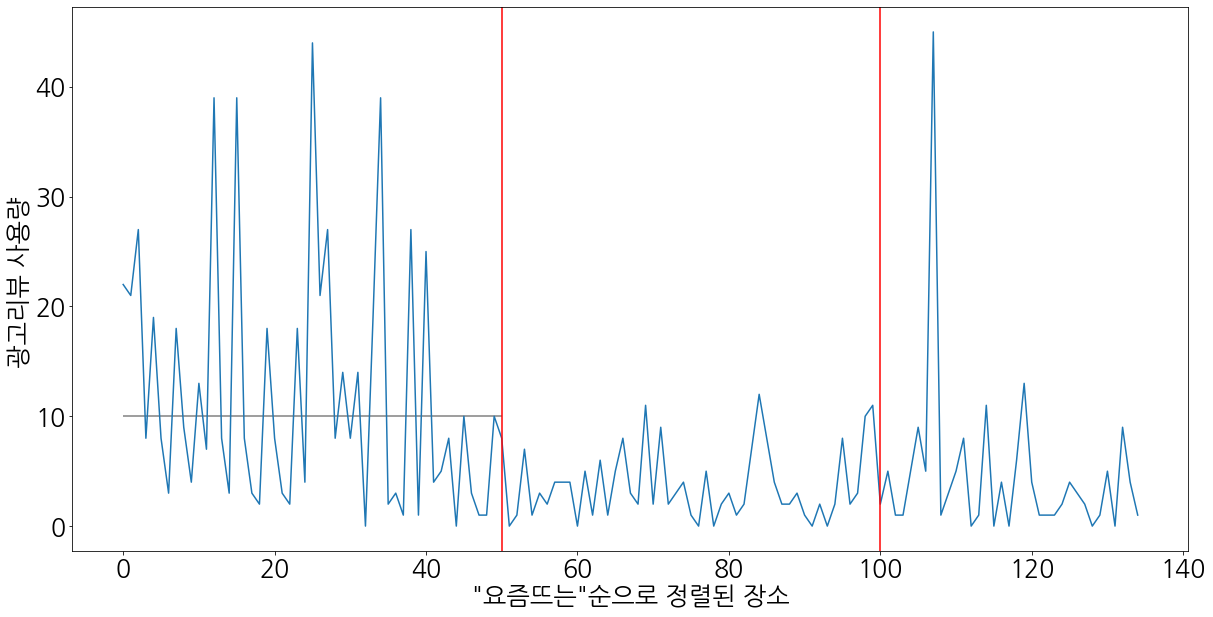

In [41]:
plt.rc('font',family='NanumGothic')
plt.rc('font',size=25)
plt.figure(figsize=(20,10))
plt.plot(data_new.total_add)
plt.axvline(50,color='red')
plt.axvline(100,color='red')
plt.xlabel(' "요즘뜨는"순으로 정렬된 장소 ')
plt.ylabel('광고리뷰 사용량 ')
plt.hlines(10,0,50,color='gray')

# 3단계 진행

In [155]:
data

,place,blog,date,content,altificial_simple,content_new,content_new_len,content_len,surplus_text
0,바비레드 강남본점,바비레드 강남본점1,16시간 전,지난주에 친구 커플과 같이 더블데이트를 하기 위해 강남에서 모임을 가졌어요.\n양식...,1,지난주 친구 커플 더블 데이트 위해 강남 모임 양식 메뉴 다채롭 수 있었고 분위기 ...,1423,2281,858
1,바비레드 강남본점,바비레드 강남본점2,2022. 6. 2. 17:42,저번 주에 친한 친구와 함께 강남역 샐러드 집에 방문해서 신선한 식사를 하고 왔어요...,1,저번 주 친한 친구 강남역 샐러드 집 방문 신선한 식사 재료 간의 조화 플레이 팅 ...,1661,2751,1090
2,바비레드 강남본점,바비레드 강남본점3,2022. 5. 27. 22:54,지난주 친한 동생 생일을 맞아\n밥을 사주기로 약속을 잡았는데요.\n멋스러운 공간은...,1,지난주 친한 동생 생일 밥 약속 멋 공간 수준 높은 강남역 스테이크 풍요롭 곳 소개...,1303,2090,787
3,바비레드 강남본점,바비레드 강남본점4,2022. 5. 27. 23:52,몇일 전 친구들이랑 같이 점심시간에 만났다가 강남역 샐러드 매장에 방문해 식사를 했...,1,일 전 친구 점심시간 강남역 샐러드 매장 방문 식사 핫 식당 화려한 플레이 팅 맛 ...,1391,2303,912
4,바비레드 강남본점,바비레드 강남본점5,2022. 6. 22. 12:47,요즘 데이트시 강남역에서 식사하는 비중이\n80%는 되는 것 같네용\n원래는 cgv...,0,요즘 데이트 시 강남역 식사 비중 것 같네용 원래 바로 뒤쪽 미즈 컨테이너 쪽 번화...,2689,3975,1286
...,...,...,...,...,...,...,...,...,...
5715,한성칼국수 논현본점,한성칼국수 논현본점56,2022. 5. 14. 16:26,한성칼국수 본점에 다녀왔다.\n강남 노른자 땅 논현에 위치한 가게다.\n1983년부...,0,칼국수 본점 강남 노른자 땅 논현 위치 가게 나 형님 가게 거의 메뉴 이렇다 칼국수...,573,959,386
5716,한성칼국수 논현본점,한성칼국수 논현본점57,2022. 3. 16. 0:55,한성칼국수 논현본점 : 네이버\n방문자리뷰 445 · 블로그리뷰 453\nnaver...,0,칼국수 논현 본점 네이버 방문자 리뷰 블로그 리뷰 준비물 명 이상 인간 돈 배 양 ...,573,932,359
5717,한성칼국수 논현본점,한성칼국수 논현본점58,2022. 3. 24. 8:22,50m\n© NAVER Corp.\n한성칼국수 논현본점\n서울특별시 강남구 언주로1...,0,칼국수 논현 본점 서울특별시 강남구 언주로 길 청호 상가 빌딩 가동 층 예약 점심 ...,332,538,206
5718,한성칼국수 논현본점,한성칼국수 논현본점59,2022. 6. 9. 21:42,평소에 소문이 자자했던 한성칼국수를 드디어 가봤다\n어르신들도 좋아할만한 재료와 풍...,0,평소 소문 자자했던 칼국수 어르신 좋아할만 재료 미를 오픈 만석 대기 메뉴판 첫 수...,227,347,120


In [156]:
#특수기호, HTML 태그 등 제거하기
import re

def preprocessor(text):
    #특수기호, HTML 태그등 제거(단, 이모티콘은 남겨둠)
    text = re.sub('<[^>]*>','', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)|\^.?\^', text)
    text = re.sub('[\W]+', ' ',text.lower()) + ' '.join(emoticons).replace('-', '')
    return text 

In [157]:
print('전처리시작')
data['content_new']=data['content'].apply(preprocessor)
print('전처리 완료 ')
data

전처리시작
전처리 완료 


,place,blog,date,content,altificial_simple,content_new,content_new_len,content_len,surplus_text
0,바비레드 강남본점,바비레드 강남본점1,16시간 전,지난주에 친구 커플과 같이 더블데이트를 하기 위해 강남에서 모임을 가졌어요.\n양식...,1,지난주에 친구 커플과 같이 더블데이트를 하기 위해 강남에서 모임을 가졌어요 양식메뉴...,1423,2281,858
1,바비레드 강남본점,바비레드 강남본점2,2022. 6. 2. 17:42,저번 주에 친한 친구와 함께 강남역 샐러드 집에 방문해서 신선한 식사를 하고 왔어요...,1,저번 주에 친한 친구와 함께 강남역 샐러드 집에 방문해서 신선한 식사를 하고 왔어요...,1661,2751,1090
2,바비레드 강남본점,바비레드 강남본점3,2022. 5. 27. 22:54,지난주 친한 동생 생일을 맞아\n밥을 사주기로 약속을 잡았는데요.\n멋스러운 공간은...,1,지난주 친한 동생 생일을 맞아 밥을 사주기로 약속을 잡았는데요 멋스러운 공간은 물론...,1303,2090,787
3,바비레드 강남본점,바비레드 강남본점4,2022. 5. 27. 23:52,몇일 전 친구들이랑 같이 점심시간에 만났다가 강남역 샐러드 매장에 방문해 식사를 했...,1,몇일 전 친구들이랑 같이 점심시간에 만났다가 강남역 샐러드 매장에 방문해 식사를 했...,1391,2303,912
4,바비레드 강남본점,바비레드 강남본점5,2022. 6. 22. 12:47,요즘 데이트시 강남역에서 식사하는 비중이\n80%는 되는 것 같네용\n원래는 cgv...,0,요즘 데이트시 강남역에서 식사하는 비중이 80 는 되는 것 같네용 원래는 cgv 바...,2689,3975,1286
...,...,...,...,...,...,...,...,...,...
5715,한성칼국수 논현본점,한성칼국수 논현본점56,2022. 5. 14. 16:26,한성칼국수 본점에 다녀왔다.\n강남 노른자 땅 논현에 위치한 가게다.\n1983년부...,0,한성칼국수 본점에 다녀왔다 강남 노른자 땅 논현에 위치한 가게다 1983년부터 했으...,573,959,386
5716,한성칼국수 논현본점,한성칼국수 논현본점57,2022. 3. 16. 0:55,한성칼국수 논현본점 : 네이버\n방문자리뷰 445 · 블로그리뷰 453\nnaver...,0,한성칼국수 논현본점 네이버 방문자리뷰 445 블로그리뷰 453 naver me 준비...,573,932,359
5717,한성칼국수 논현본점,한성칼국수 논현본점58,2022. 3. 24. 8:22,50m\n© NAVER Corp.\n한성칼국수 논현본점\n서울특별시 강남구 언주로1...,0,50m naver corp 한성칼국수 논현본점 서울특별시 강남구 언주로148길 14...,332,538,206
5718,한성칼국수 논현본점,한성칼국수 논현본점59,2022. 6. 9. 21:42,평소에 소문이 자자했던 한성칼국수를 드디어 가봤다\n어르신들도 좋아할만한 재료와 풍...,0,평소에 소문이 자자했던 한성칼국수를 드디어 가봤다 어르신들도 좋아할만한 재료와 풍미...,227,347,120


In [162]:
#형태소 분석

from konlpy.tag import Twitter 
from collections import Counter

twitter = Twitter()
morphs = []
num=0
tokenized_data = []
noun_list=[]
verv_list=[]
kp_list=[]
adj_list=[]
adv_list=[]
for sentense in data.iloc[:,5]:
    n_noun=0
    n_verv=0
    n_kp=0
    n_adj=0
    n_adv=0
    morphs = []
    morphs.append(twitter.pos(sentense))
    word_list=[] 
    for sentence in morphs : 
        for word, tag in sentence :
            if (tag in ['Noun','Verv','KoreanParticle','Adjective','Adverv']) :
                word_list.append(word)
            if (tag in ['Noun']):
                n_noun +=1
            elif (tag in ['Verv']):
                n_verv +=1
            elif (tag in ['KoreanParticle']):
                n_kp +=1
            elif (tag in ['Adjective']):
                n_adj +=1
            elif (tag in ['Adverv']):
                n_adv +=1
        noun_list.append(n_noun)
        verv_list.append(n_verv)
        kp_list.append(n_kp)
        adj_list.append(n_adj)
        adv_list.append(n_adv)
        tokenized_data.append(word_list)
    s=" ".join(word_list)
    data.iloc[num,5]=s
    num=num+1
data['noun_count']=noun_list
data['verv_count']=verv_list
data['kp_count']=kp_list
data['adj_count']=adj_list
data['adv_count']=adv_list
data

,place,blog,date,content,altificial_simple,content_new,content_new_len,content_len,surplus_text,noun_count,verv_count,kp_count,adj_count,adv_count
0,바비레드 강남본점,바비레드 강남본점1,16시간 전,지난주에 친구 커플과 같이 더블데이트를 하기 위해 강남에서 모임을 가졌어요.\n양식...,1,지난주 친구 커플 더블 데이트 위해 강남 모임 양식 메뉴 다채롭 수 있었고 분위기 ...,1423,2281,858,377,0,0,61,0
1,바비레드 강남본점,바비레드 강남본점2,2022. 6. 2. 17:42,저번 주에 친한 친구와 함께 강남역 샐러드 집에 방문해서 신선한 식사를 하고 왔어요...,1,저번 주 친한 친구 강남역 샐러드 집 방문 신선한 식사 재료 간의 조화 플레이 팅 ...,1661,2751,1090,455,0,0,88,0
2,바비레드 강남본점,바비레드 강남본점3,2022. 5. 27. 22:54,지난주 친한 동생 생일을 맞아\n밥을 사주기로 약속을 잡았는데요.\n멋스러운 공간은...,1,지난주 친한 동생 생일 밥 약속 멋 공간 수준 높은 강남역 스테이크 풍요롭 곳 소개...,1303,2090,787,338,0,3,54,0
3,바비레드 강남본점,바비레드 강남본점4,2022. 5. 27. 23:52,몇일 전 친구들이랑 같이 점심시간에 만났다가 강남역 샐러드 매장에 방문해 식사를 했...,1,일 전 친구 점심시간 강남역 샐러드 매장 방문 식사 핫 식당 화려한 플레이 팅 맛 ...,1391,2303,912,371,0,0,64,0
4,바비레드 강남본점,바비레드 강남본점5,2022. 6. 22. 12:47,요즘 데이트시 강남역에서 식사하는 비중이\n80%는 되는 것 같네용\n원래는 cgv...,0,요즘 데이트 시 강남역 식사 비중 것 같네용 원래 바로 뒤쪽 미즈 컨테이너 쪽 번화...,2689,3975,1286,731,0,6,127,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5715,한성칼국수 논현본점,한성칼국수 논현본점56,2022. 5. 14. 16:26,한성칼국수 본점에 다녀왔다.\n강남 노른자 땅 논현에 위치한 가게다.\n1983년부...,0,칼국수 본점 강남 노른자 땅 논현 위치 가게 나 형님 가게 거의 메뉴 이렇다 칼국수...,573,959,386,161,0,1,21,0
5716,한성칼국수 논현본점,한성칼국수 논현본점57,2022. 3. 16. 0:55,한성칼국수 논현본점 : 네이버\n방문자리뷰 445 · 블로그리뷰 453\nnaver...,0,칼국수 논현 본점 네이버 방문자 리뷰 블로그 리뷰 준비물 명 이상 인간 돈 배 양 ...,573,932,359,168,0,1,21,0
5717,한성칼국수 논현본점,한성칼국수 논현본점58,2022. 3. 24. 8:22,50m\n© NAVER Corp.\n한성칼국수 논현본점\n서울특별시 강남구 언주로1...,0,칼국수 논현 본점 서울특별시 강남구 언주로 길 청호 상가 빌딩 가동 층 예약 점심 ...,332,538,206,89,0,6,9,0
5718,한성칼국수 논현본점,한성칼국수 논현본점59,2022. 6. 9. 21:42,평소에 소문이 자자했던 한성칼국수를 드디어 가봤다\n어르신들도 좋아할만한 재료와 풍...,0,평소 소문 자자했던 칼국수 어르신 좋아할만 재료 미를 오픈 만석 대기 메뉴판 첫 수...,227,347,120,58,0,0,11,0


In [163]:
content_len=[]
for i in range(0,len(data)):
    content_len.append(len(data.iloc[i,3]))
data['content_len']=content_len
data

,place,blog,date,content,altificial_simple,content_new,content_new_len,content_len,surplus_text,noun_count,verv_count,kp_count,adj_count,adv_count
0,바비레드 강남본점,바비레드 강남본점1,16시간 전,지난주에 친구 커플과 같이 더블데이트를 하기 위해 강남에서 모임을 가졌어요.\n양식...,1,지난주 친구 커플 더블 데이트 위해 강남 모임 양식 메뉴 다채롭 수 있었고 분위기 ...,1423,2281,858,377,0,0,61,0
1,바비레드 강남본점,바비레드 강남본점2,2022. 6. 2. 17:42,저번 주에 친한 친구와 함께 강남역 샐러드 집에 방문해서 신선한 식사를 하고 왔어요...,1,저번 주 친한 친구 강남역 샐러드 집 방문 신선한 식사 재료 간의 조화 플레이 팅 ...,1661,2751,1090,455,0,0,88,0
2,바비레드 강남본점,바비레드 강남본점3,2022. 5. 27. 22:54,지난주 친한 동생 생일을 맞아\n밥을 사주기로 약속을 잡았는데요.\n멋스러운 공간은...,1,지난주 친한 동생 생일 밥 약속 멋 공간 수준 높은 강남역 스테이크 풍요롭 곳 소개...,1303,2090,787,338,0,3,54,0
3,바비레드 강남본점,바비레드 강남본점4,2022. 5. 27. 23:52,몇일 전 친구들이랑 같이 점심시간에 만났다가 강남역 샐러드 매장에 방문해 식사를 했...,1,일 전 친구 점심시간 강남역 샐러드 매장 방문 식사 핫 식당 화려한 플레이 팅 맛 ...,1391,2303,912,371,0,0,64,0
4,바비레드 강남본점,바비레드 강남본점5,2022. 6. 22. 12:47,요즘 데이트시 강남역에서 식사하는 비중이\n80%는 되는 것 같네용\n원래는 cgv...,0,요즘 데이트 시 강남역 식사 비중 것 같네용 원래 바로 뒤쪽 미즈 컨테이너 쪽 번화...,2689,3975,1286,731,0,6,127,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5715,한성칼국수 논현본점,한성칼국수 논현본점56,2022. 5. 14. 16:26,한성칼국수 본점에 다녀왔다.\n강남 노른자 땅 논현에 위치한 가게다.\n1983년부...,0,칼국수 본점 강남 노른자 땅 논현 위치 가게 나 형님 가게 거의 메뉴 이렇다 칼국수...,573,959,386,161,0,1,21,0
5716,한성칼국수 논현본점,한성칼국수 논현본점57,2022. 3. 16. 0:55,한성칼국수 논현본점 : 네이버\n방문자리뷰 445 · 블로그리뷰 453\nnaver...,0,칼국수 논현 본점 네이버 방문자 리뷰 블로그 리뷰 준비물 명 이상 인간 돈 배 양 ...,573,932,359,168,0,1,21,0
5717,한성칼국수 논현본점,한성칼국수 논현본점58,2022. 3. 24. 8:22,50m\n© NAVER Corp.\n한성칼국수 논현본점\n서울특별시 강남구 언주로1...,0,칼국수 논현 본점 서울특별시 강남구 언주로 길 청호 상가 빌딩 가동 층 예약 점심 ...,332,538,206,89,0,6,9,0
5718,한성칼국수 논현본점,한성칼국수 논현본점59,2022. 6. 9. 21:42,평소에 소문이 자자했던 한성칼국수를 드디어 가봤다\n어르신들도 좋아할만한 재료와 풍...,0,평소 소문 자자했던 칼국수 어르신 좋아할만 재료 미를 오픈 만석 대기 메뉴판 첫 수...,227,347,120,58,0,0,11,0


In [164]:
content_len=[]
for i in range(0,len(data)):
    content_len.append(len(data.iloc[i,5]))
data['content_new_len']=content_len
data

,place,blog,date,content,altificial_simple,content_new,content_new_len,content_len,surplus_text,noun_count,verv_count,kp_count,adj_count,adv_count
0,바비레드 강남본점,바비레드 강남본점1,16시간 전,지난주에 친구 커플과 같이 더블데이트를 하기 위해 강남에서 모임을 가졌어요.\n양식...,1,지난주 친구 커플 더블 데이트 위해 강남 모임 양식 메뉴 다채롭 수 있었고 분위기 ...,1420,2281,858,377,0,0,61,0
1,바비레드 강남본점,바비레드 강남본점2,2022. 6. 2. 17:42,저번 주에 친한 친구와 함께 강남역 샐러드 집에 방문해서 신선한 식사를 하고 왔어요...,1,저번 주 친한 친구 강남역 샐러드 집 방문 신선한 식사 재료 간의 조화 플레이 팅 ...,1661,2751,1090,455,0,0,88,0
2,바비레드 강남본점,바비레드 강남본점3,2022. 5. 27. 22:54,지난주 친한 동생 생일을 맞아\n밥을 사주기로 약속을 잡았는데요.\n멋스러운 공간은...,1,지난주 친한 동생 생일 밥 약속 멋 공간 수준 높은 강남역 스테이크 풍요롭 곳 소개...,1303,2090,787,338,0,3,54,0
3,바비레드 강남본점,바비레드 강남본점4,2022. 5. 27. 23:52,몇일 전 친구들이랑 같이 점심시간에 만났다가 강남역 샐러드 매장에 방문해 식사를 했...,1,일 전 친구 점심시간 강남역 샐러드 매장 방문 식사 핫 식당 화려한 플레이 팅 맛 ...,1391,2303,912,371,0,0,64,0
4,바비레드 강남본점,바비레드 강남본점5,2022. 6. 22. 12:47,요즘 데이트시 강남역에서 식사하는 비중이\n80%는 되는 것 같네용\n원래는 cgv...,0,요즘 데이트 시 강남역 식사 비중 것 같네용 원래 바로 뒤쪽 미즈 컨테이너 쪽 번화...,2689,3975,1286,731,0,6,127,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5715,한성칼국수 논현본점,한성칼국수 논현본점56,2022. 5. 14. 16:26,한성칼국수 본점에 다녀왔다.\n강남 노른자 땅 논현에 위치한 가게다.\n1983년부...,0,칼국수 본점 강남 노른자 땅 논현 위치 가게 나 형님 가게 거의 메뉴 이렇다 칼국수...,573,959,386,161,0,1,21,0
5716,한성칼국수 논현본점,한성칼국수 논현본점57,2022. 3. 16. 0:55,한성칼국수 논현본점 : 네이버\n방문자리뷰 445 · 블로그리뷰 453\nnaver...,0,칼국수 논현 본점 네이버 방문자 리뷰 블로그 리뷰 준비물 명 이상 인간 돈 배 양 ...,573,932,359,168,0,1,21,0
5717,한성칼국수 논현본점,한성칼국수 논현본점58,2022. 3. 24. 8:22,50m\n© NAVER Corp.\n한성칼국수 논현본점\n서울특별시 강남구 언주로1...,0,칼국수 논현 본점 서울특별시 강남구 언주로 길 청호 상가 빌딩 가동 층 예약 점심 ...,332,538,206,89,0,6,9,0
5718,한성칼국수 논현본점,한성칼국수 논현본점59,2022. 6. 9. 21:42,평소에 소문이 자자했던 한성칼국수를 드디어 가봤다\n어르신들도 좋아할만한 재료와 풍...,0,평소 소문 자자했던 칼국수 어르신 좋아할만 재료 미를 오픈 만석 대기 메뉴판 첫 수...,227,347,120,58,0,0,11,0


In [165]:
data['surplus_text']=data.content_len.astype('int')-data.content_new_len.astype('int')
data

,place,blog,date,content,altificial_simple,content_new,content_new_len,content_len,surplus_text,noun_count,verv_count,kp_count,adj_count,adv_count
0,바비레드 강남본점,바비레드 강남본점1,16시간 전,지난주에 친구 커플과 같이 더블데이트를 하기 위해 강남에서 모임을 가졌어요.\n양식...,1,지난주 친구 커플 더블 데이트 위해 강남 모임 양식 메뉴 다채롭 수 있었고 분위기 ...,1420,2281,861,377,0,0,61,0
1,바비레드 강남본점,바비레드 강남본점2,2022. 6. 2. 17:42,저번 주에 친한 친구와 함께 강남역 샐러드 집에 방문해서 신선한 식사를 하고 왔어요...,1,저번 주 친한 친구 강남역 샐러드 집 방문 신선한 식사 재료 간의 조화 플레이 팅 ...,1661,2751,1090,455,0,0,88,0
2,바비레드 강남본점,바비레드 강남본점3,2022. 5. 27. 22:54,지난주 친한 동생 생일을 맞아\n밥을 사주기로 약속을 잡았는데요.\n멋스러운 공간은...,1,지난주 친한 동생 생일 밥 약속 멋 공간 수준 높은 강남역 스테이크 풍요롭 곳 소개...,1303,2090,787,338,0,3,54,0
3,바비레드 강남본점,바비레드 강남본점4,2022. 5. 27. 23:52,몇일 전 친구들이랑 같이 점심시간에 만났다가 강남역 샐러드 매장에 방문해 식사를 했...,1,일 전 친구 점심시간 강남역 샐러드 매장 방문 식사 핫 식당 화려한 플레이 팅 맛 ...,1391,2303,912,371,0,0,64,0
4,바비레드 강남본점,바비레드 강남본점5,2022. 6. 22. 12:47,요즘 데이트시 강남역에서 식사하는 비중이\n80%는 되는 것 같네용\n원래는 cgv...,0,요즘 데이트 시 강남역 식사 비중 것 같네용 원래 바로 뒤쪽 미즈 컨테이너 쪽 번화...,2689,3975,1286,731,0,6,127,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5715,한성칼국수 논현본점,한성칼국수 논현본점56,2022. 5. 14. 16:26,한성칼국수 본점에 다녀왔다.\n강남 노른자 땅 논현에 위치한 가게다.\n1983년부...,0,칼국수 본점 강남 노른자 땅 논현 위치 가게 나 형님 가게 거의 메뉴 이렇다 칼국수...,573,959,386,161,0,1,21,0
5716,한성칼국수 논현본점,한성칼국수 논현본점57,2022. 3. 16. 0:55,한성칼국수 논현본점 : 네이버\n방문자리뷰 445 · 블로그리뷰 453\nnaver...,0,칼국수 논현 본점 네이버 방문자 리뷰 블로그 리뷰 준비물 명 이상 인간 돈 배 양 ...,573,932,359,168,0,1,21,0
5717,한성칼국수 논현본점,한성칼국수 논현본점58,2022. 3. 24. 8:22,50m\n© NAVER Corp.\n한성칼국수 논현본점\n서울특별시 강남구 언주로1...,0,칼국수 논현 본점 서울특별시 강남구 언주로 길 청호 상가 빌딩 가동 층 예약 점심 ...,332,538,206,89,0,6,9,0
5718,한성칼국수 논현본점,한성칼국수 논현본점59,2022. 6. 9. 21:42,평소에 소문이 자자했던 한성칼국수를 드디어 가봤다\n어르신들도 좋아할만한 재료와 풍...,0,평소 소문 자자했던 칼국수 어르신 좋아할만 재료 미를 오픈 만석 대기 메뉴판 첫 수...,227,347,120,58,0,0,11,0


In [125]:
from statsmodels.formula.api import ols
model1 = ols('altificial_simple ~ content_len*content_new_len*surplus_text',data=data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      altificial_simple   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     81.51
Date:                Sat, 16 Jul 2022   Prob (F-statistic):           3.25e-98
Time:                        09:03:24   Log-Likelihood:                -1362.2
No. Observations:                5720   AIC:                             2738.
Df Residuals:                    5713   BIC:                             2785.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -0.0578      0.016     -3.722      0.000      -0.088      -0.027
content_len                               8.771e-05   1.32e-05      6.639      0.000    6.18e-05       0.000
content_new_len                           2.487e-05    3.4e-05      0.730      0.465   -4.19e-05    9.16e-05
content_len:content_new_len               9.079e-08   1.58e-08      5.731      0.000    5.97e-08    1.22e-07
surplus_text                              6.292e-05   3.79e-05      1.662      0.097   -1.13e-05       0.000
content_len:surplus_text                  3.207e-08   1.78e-08      1.803      0.071    -2.8e-09    6.69e-08
content_new_len:surplus_text             -3.274e-07   4.96e-08     -6.600      0.000   -4.25e-07    -2.3e-07
content_len:content_new_len:surplus_text -2.018e-13   1.88e-12     -0.107      0.914   -3.88e-12    3.48e-12
==============================================================================
Omnibus:                     2290.855   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7141.659
Skew:                           2.148   Prob(JB):                         0.00
Kurtosis:                       6.392   Cond. No.                     1.43e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.33e-13. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [166]:
#인위적/자연적 블로그리뷰 비율 맞춰주기 (다운스케일링)
nature=data[data.altificial_simple==0].sample(n=662,replace=False)
nature

,place,blog,date,content,altificial_simple,content_new,content_new_len,content_len,surplus_text,noun_count,verv_count,kp_count,adj_count,adv_count
3037,비야게레로,비야게레로2,2022. 5. 9. 23:46,삼성동 비야게레로\n멕시코에서 온 진짜 타코\n직장 후배에서 동네 동생으로 만난 우...,0,삼성동 비야 게레로 멕시코 온 진짜 타코 직장 후배 동네 동생 만난 우리 언제 이쁘...,1032,1588,556,300,0,1,34,0
5475,이웃집 통통이 본점,이웃집 통통이 본점4,2022. 6. 21. 21:01,* 내돈내먹의 주관적인 후기입니다.\n안녕하세요? 다이어터 마성술키 입니다.\nㅎㅎ...,0,돈내 주관 후기 입니다 안녕하세요 다이어터 마 술키 입니다 ㅎㅎㅎㅎㅎㅎㅎㅎ 오늘 이...,918,1384,466,233,0,11,39,0
5027,갓덴스시 강남점,갓덴스시 강남점44,2022. 4. 13. 16:42,지금은 2022년 4월이 됐지만 하하~\n11월.. 레츠고~^^\n<11월 1일>\...,0,지금 하하 레츠고 유태 양씨 인스타 이 사진 이 사진 좋아요 머 야머 그 오케이 구...,1192,2230,1038,349,0,14,32,0
4044,맛짱조개,맛짱조개4,2022. 5. 13. 8:00,주말 약속있어 논현동 나갔더니\n예전에\n대기 ㅎㄷㄷ 해서 못갔던\n#맛짱조개 가 ...,0,주말 약속 있어 논현동 예전 대기 ㅎㄷㄷ 맛 조개 보이 ㅎㅎㅎㅎ 토요일 그랫는 오후...,1018,1678,660,307,0,12,26,0
5617,오리지널팬케이크하우스 가로수길점,오리지널팬케이크하우스 가로수길점38,2020. 8. 31. 2:19,애견 용품 3개를 사면 1개가 기부되는 착한 사이트. #도그네이션 에서 사료와 쿨매...,0,애견 용품 개 사면 개 기부 착한 사이트 도 네이션 사료 쿨 매트 구매 개 사면 부...,704,1155,451,210,0,0,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,버거앤프라이즈 대치점,버거앤프라이즈 대치점2,2022. 5. 29. 20:23,오늘도 자부의 날인 콤콤맘\n(이제 자부 끝..🥲)\n친한 언니집에 놀러가기로 함!...,0,오늘 자부 날인 콤콤맘 이제 자부 끝 친한 집 가기 함 가기 전 잠시 내 좋아하는 ...,993,1401,408,290,0,4,26,0
3378,도산맘마미아,도산맘마미아47,2022. 5. 11. 13:28,#압구정로데오 #나들이 #포토이즘 #photoism\n#맘마미아 #리틀넥 #도산맘마...,0,압구정 로데오 나들이 포토 이즘 맘마미아 리틀 넥 도산 맘마미아 도산 리틀 넥 압구...,1738,2958,1220,470,0,16,65,0
5301,아카라,아카라38,2019. 7. 31. 1:35,아카라 맛의 깊이가 달랐음\n논현동 이자카야 단골각\n저번에 친구 따라갔다가 괜찮다...,0,카라 맛 깊이 달랐음 논현동 이자카야 단골 각 저번 친구 괜찮다 생각 이번 다시 곳...,1371,2279,908,366,0,0,75,0
3309,콴안다오,콴안다오11,2022. 6. 22. 21:21,#콴안다오 #신사역맛집 #가로수길맛집 #콴안다오반미 #콴안다오퍼보 #콴안다오껌승 #...,0,콴 신사역 맛집 가로수길 맛집 콴 반미 콴 보 콴 껌승 신사역 데이트 가로수길 데이...,451,802,351,119,0,0,21,0


In [167]:
altificial=data[data.altificial_simple==1]

In [168]:
data_scaling=pd.concat([altificial,nature])
data_scaling.reset_index(inplace=True)
data_scaling.drop('index',axis=1,inplace=True)
data_scaling

,place,blog,date,content,altificial_simple,content_new,content_new_len,content_len,surplus_text,noun_count,verv_count,kp_count,adj_count,adv_count
0,바비레드 강남본점,바비레드 강남본점1,16시간 전,지난주에 친구 커플과 같이 더블데이트를 하기 위해 강남에서 모임을 가졌어요.\n양식...,1,지난주 친구 커플 더블 데이트 위해 강남 모임 양식 메뉴 다채롭 수 있었고 분위기 ...,1420,2281,861,377,0,0,61,0
1,바비레드 강남본점,바비레드 강남본점2,2022. 6. 2. 17:42,저번 주에 친한 친구와 함께 강남역 샐러드 집에 방문해서 신선한 식사를 하고 왔어요...,1,저번 주 친한 친구 강남역 샐러드 집 방문 신선한 식사 재료 간의 조화 플레이 팅 ...,1661,2751,1090,455,0,0,88,0
2,바비레드 강남본점,바비레드 강남본점3,2022. 5. 27. 22:54,지난주 친한 동생 생일을 맞아\n밥을 사주기로 약속을 잡았는데요.\n멋스러운 공간은...,1,지난주 친한 동생 생일 밥 약속 멋 공간 수준 높은 강남역 스테이크 풍요롭 곳 소개...,1303,2090,787,338,0,3,54,0
3,바비레드 강남본점,바비레드 강남본점4,2022. 5. 27. 23:52,몇일 전 친구들이랑 같이 점심시간에 만났다가 강남역 샐러드 매장에 방문해 식사를 했...,1,일 전 친구 점심시간 강남역 샐러드 매장 방문 식사 핫 식당 화려한 플레이 팅 맛 ...,1391,2303,912,371,0,0,64,0
4,바비레드 강남본점,바비레드 강남본점6,2022. 6. 2. 13:52,지난번 종로에서 방문해서 맛있었던 기억으로 남편과 함께 맛있는 강남 데이트 핫플이 ...,1,지난번 종로 방문 맛있었던 기억 남편 맛있는 강남 데이트 핫플 있다고 보기 합리 가...,1667,2738,1071,439,0,0,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,버거앤프라이즈 대치점,버거앤프라이즈 대치점2,2022. 5. 29. 20:23,오늘도 자부의 날인 콤콤맘\n(이제 자부 끝..🥲)\n친한 언니집에 놀러가기로 함!...,0,오늘 자부 날인 콤콤맘 이제 자부 끝 친한 집 가기 함 가기 전 잠시 내 좋아하는 ...,993,1401,408,290,0,4,26,0
1320,도산맘마미아,도산맘마미아47,2022. 5. 11. 13:28,#압구정로데오 #나들이 #포토이즘 #photoism\n#맘마미아 #리틀넥 #도산맘마...,0,압구정 로데오 나들이 포토 이즘 맘마미아 리틀 넥 도산 맘마미아 도산 리틀 넥 압구...,1738,2958,1220,470,0,16,65,0
1321,아카라,아카라38,2019. 7. 31. 1:35,아카라 맛의 깊이가 달랐음\n논현동 이자카야 단골각\n저번에 친구 따라갔다가 괜찮다...,0,카라 맛 깊이 달랐음 논현동 이자카야 단골 각 저번 친구 괜찮다 생각 이번 다시 곳...,1371,2279,908,366,0,0,75,0
1322,콴안다오,콴안다오11,2022. 6. 22. 21:21,#콴안다오 #신사역맛집 #가로수길맛집 #콴안다오반미 #콴안다오퍼보 #콴안다오껌승 #...,0,콴 신사역 맛집 가로수길 맛집 콴 반미 콴 보 콴 껌승 신사역 데이트 가로수길 데이...,451,802,351,119,0,0,21,0


In [129]:
# features/target, train/test dataset 분리
from sklearn.model_selection import train_test_split
X=data_scaling[['content_len','content_new_len','surplus_text']]
y=data_scaling['altificial_simple']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 101) 
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(926, 3) (398, 3) (926,) (398,)


In [130]:
#기본적인 randomforest모형

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수

clf = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=0)
clf.fit(train_x,train_y)

predict1 = clf.predict(test_x)
print(accuracy_score(test_y,predict1))

0.6507537688442211


In [169]:
from statsmodels.formula.api import ols
model2 = ols('altificial_simple ~ content_len*content_new_len*surplus_text ',data=data_scaling).fit()
model2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      altificial_simple   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     51.23
Date:                Sat, 16 Jul 2022   Prob (F-statistic):           8.13e-57
Time:                        10:18:37   Log-Likelihood:                -822.09
No. Observations:                1324   AIC:                             1658.
Df Residuals:                    1317   BIC:                             1694.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -0.1545      0.050     -3.063      0.002      -0.253      -0.056
content_len                                  0.0003   3.94e-05      8.564      0.000       0.000       0.000
content_new_len                              0.0004   9.24e-05      4.064      0.000       0.000       0.001
content_len:content_new_len              -2.761e-09   3.49e-08     -0.079      0.937   -7.13e-08    6.58e-08
surplus_text                             -3.838e-05      0.000     -0.362      0.717      -0.000       0.000
content_len:surplus_text                  7.103e-08   5.36e-08      1.324      0.186   -3.42e-08    1.76e-07
content_new_len:surplus_text             -5.297e-07   1.29e-07     -4.110      0.000   -7.83e-07   -2.77e-07
content_len:content_new_len:surplus_text   2.01e-11   4.42e-12      4.544      0.000    1.14e-11    2.88e-11
==============================================================================
Omnibus:                     2072.721   Durbin-Watson:                   0.357
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.100
Skew:                          -0.006   Prob(JB):                     4.49e-20
Kurtosis:                       1.729   Cond. No.                     9.98e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.97e-15. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
# 블로그별사용 이미지 개수 변수 추가

In [170]:
#사용된 이미지의 개수를 독립변수로 활용

data_image_count=pd.DataFrame(columns ={'blog','image_count'})
data_image_count=data_image_count[['blog','image_count']]
curr_idx=0
import os
folder_list = os.listdir(r'C:\Users\ecopl\image_blog')
for blog in folder_list:
    image_list=[]
    image_list=os.listdir(r'C:\Users\ecopl\image_blog'+"/"+blog)
    #print(image_list)
    try:
        last_image=image_list[-1]
    except:
        continue
    data_image_count.loc[curr_idx]=[blog,last_image]
    curr_idx+=1
            
data_image_count   

,blog,image_count
0,BISTROT de YOUNTVILLE1,112.jpg
1,BISTROT de YOUNTVILLE10,68.jpg
2,BISTROT de YOUNTVILLE11,112.jpg
3,BISTROT de YOUNTVILLE12,62.jpg
4,BISTROT de YOUNTVILLE14,42.jpg
...,...,...
4958,후추포인트6,238.jpg
4959,후추포인트60,44.jpg
4960,후추포인트7,42.jpg
4961,후추포인트8,30.jpg


In [171]:
count=[]
for i in range(0,len(data_image_count) ):
    if data_image_count.image_count[i][2].isdigit():
        count.append(data_image_count.image_count[i][0:3] )
    elif data_image_count.image_count[i][1].isdigit():
        count.append(data_image_count.image_count[i][0:2] )
    elif data_image_count.image_count[i][0].isdigit():
        count.append(data_image_count.image_count[i][0:1] )
count

['112',
 '68',
 '112',
 '62',
 '42',
 '76',
 '70',
 '58',
 '68',
 '52',
 '52',
 '50',
 '42',
 '56',
 '46',
 '28',
 '46',
 '56',
 '52',
 '60',
 '50',
 '38',
 '34',
 '34',
 '82',
 '52',
 '30',
 '46',
 '62',
 '48',
 '36',
 '86',
 '36',
 '56',
 '78',
 '60',
 '9',
 '50',
 '84',
 '44',
 '46',
 '62',
 '58',
 '74',
 '30',
 '152',
 '42',
 '56',
 '54',
 '60',
 '9',
 '9',
 '42',
 '110',
 '28',
 '40',
 '60',
 '72',
 '88',
 '50',
 '44',
 '28',
 '50',
 '52',
 '58',
 '64',
 '9',
 '48',
 '56',
 '52',
 '56',
 '44',
 '20',
 '120',
 '54',
 '74',
 '74',
 '42',
 '34',
 '56',
 '66',
 '9',
 '70',
 '58',
 '28',
 '76',
 '86',
 '72',
 '82',
 '60',
 '80',
 '46',
 '52',
 '24',
 '40',
 '64',
 '22',
 '52',
 '32',
 '60',
 '40',
 '99',
 '80',
 '9',
 '36',
 '44',
 '34',
 '20',
 '28',
 '34',
 '20',
 '74',
 '22',
 '9',
 '40',
 '54',
 '26',
 '56',
 '142',
 '9',
 '38',
 '42',
 '9',
 '8',
 '50',
 '9',
 '40',
 '38',
 '32',
 '38',
 '9',
 '9',
 '9',
 '36',
 '9',
 '9',
 '22',
 '20',
 '196',
 '132',
 '46',
 '8',
 '48',
 '40',
 

In [172]:
for i in range(0,len(count)):
    if (count[i].isdigit())==False:
        print("!")

In [173]:
data_image_count.image_count=count
data_image_count

,blog,image_count
0,BISTROT de YOUNTVILLE1,112
1,BISTROT de YOUNTVILLE10,68
2,BISTROT de YOUNTVILLE11,112
3,BISTROT de YOUNTVILLE12,62
4,BISTROT de YOUNTVILLE14,42
...,...,...
4958,후추포인트6,238
4959,후추포인트60,44
4960,후추포인트7,42
4961,후추포인트8,30


In [174]:
data_1=pd.merge(data,data_image_count,how='left',on='blog')
data_1

,place,blog,date,content,altificial_simple,content_new,content_new_len,content_len,surplus_text,noun_count,verv_count,kp_count,adj_count,adv_count,image_count
0,바비레드 강남본점,바비레드 강남본점1,16시간 전,지난주에 친구 커플과 같이 더블데이트를 하기 위해 강남에서 모임을 가졌어요.\n양식...,1,지난주 친구 커플 더블 데이트 위해 강남 모임 양식 메뉴 다채롭 수 있었고 분위기 ...,1420,2281,861,377,0,0,61,0,50
1,바비레드 강남본점,바비레드 강남본점2,2022. 6. 2. 17:42,저번 주에 친한 친구와 함께 강남역 샐러드 집에 방문해서 신선한 식사를 하고 왔어요...,1,저번 주 친한 친구 강남역 샐러드 집 방문 신선한 식사 재료 간의 조화 플레이 팅 ...,1661,2751,1090,455,0,0,88,0,50
2,바비레드 강남본점,바비레드 강남본점3,2022. 5. 27. 22:54,지난주 친한 동생 생일을 맞아\n밥을 사주기로 약속을 잡았는데요.\n멋스러운 공간은...,1,지난주 친한 동생 생일 밥 약속 멋 공간 수준 높은 강남역 스테이크 풍요롭 곳 소개...,1303,2090,787,338,0,3,54,0,50
3,바비레드 강남본점,바비레드 강남본점4,2022. 5. 27. 23:52,몇일 전 친구들이랑 같이 점심시간에 만났다가 강남역 샐러드 매장에 방문해 식사를 했...,1,일 전 친구 점심시간 강남역 샐러드 매장 방문 식사 핫 식당 화려한 플레이 팅 맛 ...,1391,2303,912,371,0,0,64,0,52
4,바비레드 강남본점,바비레드 강남본점5,2022. 6. 22. 12:47,요즘 데이트시 강남역에서 식사하는 비중이\n80%는 되는 것 같네용\n원래는 cgv...,0,요즘 데이트 시 강남역 식사 비중 것 같네용 원래 바로 뒤쪽 미즈 컨테이너 쪽 번화...,2689,3975,1286,731,0,6,127,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5715,한성칼국수 논현본점,한성칼국수 논현본점56,2022. 5. 14. 16:26,한성칼국수 본점에 다녀왔다.\n강남 노른자 땅 논현에 위치한 가게다.\n1983년부...,0,칼국수 본점 강남 노른자 땅 논현 위치 가게 나 형님 가게 거의 메뉴 이렇다 칼국수...,573,959,386,161,0,1,21,0,24
5716,한성칼국수 논현본점,한성칼국수 논현본점57,2022. 3. 16. 0:55,한성칼국수 논현본점 : 네이버\n방문자리뷰 445 · 블로그리뷰 453\nnaver...,0,칼국수 논현 본점 네이버 방문자 리뷰 블로그 리뷰 준비물 명 이상 인간 돈 배 양 ...,573,932,359,168,0,1,21,0,30
5717,한성칼국수 논현본점,한성칼국수 논현본점58,2022. 3. 24. 8:22,50m\n© NAVER Corp.\n한성칼국수 논현본점\n서울특별시 강남구 언주로1...,0,칼국수 논현 본점 서울특별시 강남구 언주로 길 청호 상가 빌딩 가동 층 예약 점심 ...,332,538,206,89,0,6,9,0,26
5718,한성칼국수 논현본점,한성칼국수 논현본점59,2022. 6. 9. 21:42,평소에 소문이 자자했던 한성칼국수를 드디어 가봤다\n어르신들도 좋아할만한 재료와 풍...,0,평소 소문 자자했던 칼국수 어르신 좋아할만 재료 미를 오픈 만석 대기 메뉴판 첫 수...,227,347,120,58,0,0,11,0,9


In [179]:
data_1.image_count.fillna(0,inplace=True)


In [180]:
data_1.isnull().sum()

place                0
blog                 0
date                 0
content              0
altificial_simple    0
content_new          0
content_new_len      0
content_len          0
surplus_text         0
noun_count           0
verv_count           0
kp_count             0
adj_count            0
adv_count            0
image_count          0
dtype: int64

In [181]:
data_1['image_count']=data_1.image_count.astype('int')

In [182]:
data_1

,place,blog,date,content,altificial_simple,content_new,content_new_len,content_len,surplus_text,noun_count,verv_count,kp_count,adj_count,adv_count,image_count
0,바비레드 강남본점,바비레드 강남본점1,16시간 전,지난주에 친구 커플과 같이 더블데이트를 하기 위해 강남에서 모임을 가졌어요.\n양식...,1,지난주 친구 커플 더블 데이트 위해 강남 모임 양식 메뉴 다채롭 수 있었고 분위기 ...,1420,2281,861,377,0,0,61,0,50
1,바비레드 강남본점,바비레드 강남본점2,2022. 6. 2. 17:42,저번 주에 친한 친구와 함께 강남역 샐러드 집에 방문해서 신선한 식사를 하고 왔어요...,1,저번 주 친한 친구 강남역 샐러드 집 방문 신선한 식사 재료 간의 조화 플레이 팅 ...,1661,2751,1090,455,0,0,88,0,50
2,바비레드 강남본점,바비레드 강남본점3,2022. 5. 27. 22:54,지난주 친한 동생 생일을 맞아\n밥을 사주기로 약속을 잡았는데요.\n멋스러운 공간은...,1,지난주 친한 동생 생일 밥 약속 멋 공간 수준 높은 강남역 스테이크 풍요롭 곳 소개...,1303,2090,787,338,0,3,54,0,50
3,바비레드 강남본점,바비레드 강남본점4,2022. 5. 27. 23:52,몇일 전 친구들이랑 같이 점심시간에 만났다가 강남역 샐러드 매장에 방문해 식사를 했...,1,일 전 친구 점심시간 강남역 샐러드 매장 방문 식사 핫 식당 화려한 플레이 팅 맛 ...,1391,2303,912,371,0,0,64,0,52
4,바비레드 강남본점,바비레드 강남본점5,2022. 6. 22. 12:47,요즘 데이트시 강남역에서 식사하는 비중이\n80%는 되는 것 같네용\n원래는 cgv...,0,요즘 데이트 시 강남역 식사 비중 것 같네용 원래 바로 뒤쪽 미즈 컨테이너 쪽 번화...,2689,3975,1286,731,0,6,127,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5715,한성칼국수 논현본점,한성칼국수 논현본점56,2022. 5. 14. 16:26,한성칼국수 본점에 다녀왔다.\n강남 노른자 땅 논현에 위치한 가게다.\n1983년부...,0,칼국수 본점 강남 노른자 땅 논현 위치 가게 나 형님 가게 거의 메뉴 이렇다 칼국수...,573,959,386,161,0,1,21,0,24
5716,한성칼국수 논현본점,한성칼국수 논현본점57,2022. 3. 16. 0:55,한성칼국수 논현본점 : 네이버\n방문자리뷰 445 · 블로그리뷰 453\nnaver...,0,칼국수 논현 본점 네이버 방문자 리뷰 블로그 리뷰 준비물 명 이상 인간 돈 배 양 ...,573,932,359,168,0,1,21,0,30
5717,한성칼국수 논현본점,한성칼국수 논현본점58,2022. 3. 24. 8:22,50m\n© NAVER Corp.\n한성칼국수 논현본점\n서울특별시 강남구 언주로1...,0,칼국수 논현 본점 서울특별시 강남구 언주로 길 청호 상가 빌딩 가동 층 예약 점심 ...,332,538,206,89,0,6,9,0,26
5718,한성칼국수 논현본점,한성칼국수 논현본점59,2022. 6. 9. 21:42,평소에 소문이 자자했던 한성칼국수를 드디어 가봤다\n어르신들도 좋아할만한 재료와 풍...,0,평소 소문 자자했던 칼국수 어르신 좋아할만 재료 미를 오픈 만석 대기 메뉴판 첫 수...,227,347,120,58,0,0,11,0,9


In [184]:
#인위적/자연적 블로그리뷰 비율 맞춰주기 (다운스케일링)
nature=data_1[data_1.altificial_simple==0].sample(n=662,replace=False,random_state=101)
altificial=data_1[data_1.altificial_simple==1]
data_scaling=pd.concat([altificial,nature])
data_scaling.reset_index(inplace=True)
data_scaling.drop('index',axis=1,inplace=True)
data_scaling

,place,blog,date,content,altificial_simple,content_new,content_new_len,content_len,surplus_text,noun_count,verv_count,kp_count,adj_count,adv_count,image_count
0,바비레드 강남본점,바비레드 강남본점1,16시간 전,지난주에 친구 커플과 같이 더블데이트를 하기 위해 강남에서 모임을 가졌어요.\n양식...,1,지난주 친구 커플 더블 데이트 위해 강남 모임 양식 메뉴 다채롭 수 있었고 분위기 ...,1420,2281,861,377,0,0,61,0,50
1,바비레드 강남본점,바비레드 강남본점2,2022. 6. 2. 17:42,저번 주에 친한 친구와 함께 강남역 샐러드 집에 방문해서 신선한 식사를 하고 왔어요...,1,저번 주 친한 친구 강남역 샐러드 집 방문 신선한 식사 재료 간의 조화 플레이 팅 ...,1661,2751,1090,455,0,0,88,0,50
2,바비레드 강남본점,바비레드 강남본점3,2022. 5. 27. 22:54,지난주 친한 동생 생일을 맞아\n밥을 사주기로 약속을 잡았는데요.\n멋스러운 공간은...,1,지난주 친한 동생 생일 밥 약속 멋 공간 수준 높은 강남역 스테이크 풍요롭 곳 소개...,1303,2090,787,338,0,3,54,0,50
3,바비레드 강남본점,바비레드 강남본점4,2022. 5. 27. 23:52,몇일 전 친구들이랑 같이 점심시간에 만났다가 강남역 샐러드 매장에 방문해 식사를 했...,1,일 전 친구 점심시간 강남역 샐러드 매장 방문 식사 핫 식당 화려한 플레이 팅 맛 ...,1391,2303,912,371,0,0,64,0,52
4,바비레드 강남본점,바비레드 강남본점6,2022. 6. 2. 13:52,지난번 종로에서 방문해서 맛있었던 기억으로 남편과 함께 맛있는 강남 데이트 핫플이 ...,1,지난번 종로 방문 맛있었던 기억 남편 맛있는 강남 데이트 핫플 있다고 보기 합리 가...,1667,2738,1071,439,0,0,90,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,대막,대막50,2022. 6. 7. 18:05,오늘도 마치는 시간보다 1시간이 늦게 끝났지만 그만큼 많은 보람이 있는 하루였습니다...,0,오늘 시간 많은 보람 있는 하루 분 분 정성 치료 저 포함 직원 모두 뿌듯하고 보람...,685,1198,513,184,0,1,40,0,9
1320,달래해장,달래해장34,2022. 5. 29. 19:51,몇 주전부터 가고싶었던 신사역에 있는 #신사하초 에 오늘도 방문계획을 하였으나… 역...,0,몇 주전 신사역 있는 신사 초 오늘 방문 계획 역시 시간 포기 달래 해장국 해장국 ...,431,722,291,119,0,3,14,0,9
1321,신사전,신사전9,2022. 6. 24. 23:39,이번주는 다채롭게 써보겠어요\n시간 순삭 보장\n6/17\n한 학기동안 고생한 내 ...,0,이번 다채롭 시간 순삭 보장 학기 동안 고생 내 자신 프린트 비만 같음 진짜 이마트...,1831,3039,1208,529,0,14,56,0,72
1322,에뚜왈,에뚜왈2,2022. 6. 23. 0:30,유명한곳인지도 몰랐고\n길 걷다가 다들 줄 서길래\n어!? 나도!!!!\n근데 정말...,0,유명한 곳 인지도 길 줄 정말 이런 좋은 것 같다 역시 맛집 ㅋㅋㅋㅋㅋㅋㅋㅋ 가로수...,391,577,186,89,0,4,20,0,22


In [190]:
# features/target, train/test dataset 분리
from sklearn.model_selection import train_test_split
X=data_scaling[['content_len','content_new_len','surplus_text','image_count','noun_count','verv_count','kp_count','adj_count','adv_count']]
y=data_scaling['altificial_simple']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 101) 
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(926, 9) (398, 9) (926,) (398,)


In [191]:
#기본적인 randomforest모형

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수

clf = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=0)
clf.fit(train_x,train_y)

predict1 = clf.predict(test_x)
print(accuracy_score(test_y,predict1))

0.7035175879396985


In [188]:
#image_count도 성능향상에 유의

In [249]:
#문장 벡터화 시도(tfidf)
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords=['강남','서울특별시','강남구','서울특별시 강남구','강남역','청담','가로수길','압구정','서울']
data_tfidf = TfidfVectorizer(max_features=100,analyzer='word',ngram_range=(1,3),stop_words=stopwords).fit(data_1.content_new)
X=data_tfidf.transform(data_1.content_new)
print(data_tfidf.vocabulary_.keys())


dict_keys(['친구', '데이트', '메뉴', '분위기', '예약', '시간', '위치', '방문', '같아요', '저희', '느낌', '테이블', '식사', '메뉴판', '좋은', '세트', '선택', '아주', '주문', '샐러드', '파스타', '스테이크', '하나', '그냥', '먹기', '음식', '치즈', '소스', '매장', '고기', '다음', '자동', '크림', '재생', '화질', '옵션', '추천', '입니다', '재생 화질', '화질 선택', '선택 옵션', '옵션 자동', '재생 화질 선택', '화질 선택 옵션', '선택 옵션 자동', '식당', '있다', '있는', '있어서', '생각', '자리', '때문', '웨이', '가지', '가격', '정도', '맛집', '여기', '역시', '조금', '저녁', '내부', 'ㅎㅎ', '살짝', '한번', '바로', '다른', '보고', '요즘', '처음', '정말', '카페', '가게', '사람', '같은', '사진', '와인', '추가', '있어요', 'ㅋㅋ', 'ㅋㅋㅋ', '떡볶이', '진짜', '맛있게', '우리', '있고', '맛있는', '사실', '디저트', '요리', 'ㅠㅠ', '오늘', '점심', '피자', '새우', '커피', '맥주', '버거', '튀김', '도산'])


In [250]:
#리뷰-키워드 벡터공간생성
tfidf_dict = data_tfidf.get_feature_names()
data_array = X.toarray()
tfidf_df=pd.DataFrame(data=data_array,columns=tfidf_dict)
tfidf_df['content_len']=data_1['content_len']
tfidf_df['content_new_len']=data_1['content_new_len']
tfidf_df['surplus_text']=data_1['surplus_text']
tfidf_df['image_count']=data_1['image_count']
tfidf_df['noun_count']=data_1['noun_count']
tfidf_df['verv_count']=data_1['verv_count']
tfidf_df['kp_count']=data_1['kp_count']
tfidf_df['adv_count']=data_1['adv_count']
tfidf_df['adj_count']=data_1['adj_count']
tfidf_df['altificial']=data_1['altificial_simple']

tfidf_df

,ㅋㅋ,ㅋㅋㅋ,ㅎㅎ,ㅠㅠ,가게,가격,가지,같아요,같은,고기,...,content_len,content_new_len,surplus_text,image_count,noun_count,verv_count,kp_count,adv_count,adj_count,altificial
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.053737,0.00000,0.052233,...,2281,1420,861,50,377,0,0,0,61,1
1,0.000000,0.000000,0.000000,0.0,0.000000,0.049453,0.058140,0.000000,0.00000,0.219739,...,2751,1661,1090,50,455,0,0,0,88,1
2,0.000000,0.000000,0.112792,0.0,0.000000,0.000000,0.000000,0.062930,0.00000,0.000000,...,2090,1303,787,50,338,0,3,0,54,1
3,0.000000,0.000000,0.000000,0.0,0.000000,0.048956,0.000000,0.055948,0.00000,0.054382,...,2303,1391,912,52,371,0,0,0,64,1
4,0.069779,0.034911,0.060732,0.0,0.073257,0.177896,0.000000,0.033884,0.06067,0.098807,...,3975,2689,1286,90,731,0,6,0,127,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5715,0.000000,0.000000,0.000000,0.0,0.252308,0.612697,0.000000,0.000000,0.00000,0.000000,...,959,573,386,24,161,0,1,0,21,0
5716,0.000000,0.180105,0.000000,0.0,0.000000,0.305923,0.000000,0.000000,0.00000,0.000000,...,932,573,359,30,168,0,1,0,21,0
5717,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,538,332,206,26,89,0,6,0,9,0
5718,0.000000,0.000000,0.000000,0.0,0.000000,0.252980,0.297419,0.000000,0.00000,0.281022,...,347,227,120,9,58,0,0,0,11,0


In [251]:
#워드임베딩 진행하고 인위적/자연적 블로그리뷰 비율 맞춰주기 (다운스케일링)
nature=tfidf_df[tfidf_df.altificial==0].sample(n=662,replace=False,random_state=101)
altificial=tfidf_df[tfidf_df.altificial==1]
data_scaling=pd.concat([altificial,nature])
data_scaling.reset_index(inplace=True)
data_scaling.drop('index',axis=1,inplace=True)
data_scaling

,ㅋㅋ,ㅋㅋㅋ,ㅎㅎ,ㅠㅠ,가게,가격,가지,같아요,같은,고기,...,content_len,content_new_len,surplus_text,image_count,noun_count,verv_count,kp_count,adv_count,adj_count,altificial
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.053737,0.000000,0.052233,...,2281,1420,861,50,377,0,0,0,61,1
1,0.000000,0.0,0.000000,0.000000,0.000000,0.049453,0.058140,0.000000,0.000000,0.219739,...,2751,1661,1090,50,455,0,0,0,88,1
2,0.000000,0.0,0.112792,0.000000,0.000000,0.000000,0.000000,0.062930,0.000000,0.000000,...,2090,1303,787,50,338,0,3,0,54,1
3,0.000000,0.0,0.000000,0.000000,0.000000,0.048956,0.000000,0.055948,0.000000,0.054382,...,2303,1391,912,52,371,0,0,0,64,1
4,0.000000,0.0,0.000000,0.000000,0.056081,0.045395,0.000000,0.000000,0.046445,0.100854,...,2738,1667,1071,50,439,0,0,0,90,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,0.000000,0.0,0.081910,0.000000,0.000000,0.000000,0.282078,0.000000,0.000000,0.000000,...,1198,685,513,9,184,0,1,0,40,0
1320,0.315206,0.0,0.000000,0.000000,0.000000,0.133932,0.000000,0.000000,0.000000,0.297556,...,722,431,291,9,119,0,3,0,14,0
1321,0.083291,0.0,0.000000,0.087673,0.000000,0.000000,0.000000,0.080891,0.000000,0.000000,...,3039,1831,1208,72,529,0,14,0,56,0
1322,0.000000,0.0,0.000000,0.000000,0.244373,0.000000,0.000000,0.000000,0.202383,0.000000,...,577,391,186,22,89,0,4,0,20,0


In [267]:
from statsmodels.formula.api import ols
model3 = ols('altificial ~ content_len*content_new_len*image_count*surplus_text*image_count ',data=data_scaling).fit()
model3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             altificial   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     19.67
Date:                Sat, 16 Jul 2022   Prob (F-statistic):           1.03e-42
Time:                        18:52:02   Log-Likelihood:                -842.91
No. Observations:                1324   AIC:                             1714.
Df Residuals:                    1310   BIC:                             1786.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                               -0.1325      0.091     -1.453      0.147      -0.311       0.046
content_len                                              0.0003      0.000      2.627      0.009    7.22e-05       0.000
content_new_len                                          0.0003      0.000      1.368      0.171      -0.000       0.001
content_len:content_new_len                          -8.066e-08   8.96e-08     -0.900      0.368   -2.56e-07    9.52e-08
image_count                                              0.0021      0.002      1.019      0.309      -0.002       0.006
content_len:image_count                              -9.601e-07   1.34e-06     -0.715      0.475    -3.6e-06    1.68e-06
content_new_len:image_count                           1.019e-07   3.18e-06      0.032      0.974   -6.14e-06    6.34e-06
content_len:content_new_len:image_count               3.808e-10   9.16e-10      0.416      0.678   -1.42e-09    2.18e-09
surplus_text                                         -2.472e-05      0.000     -0.086      0.932      -0.001       0.001
content_len:surplus_text                              1.127e-08   1.53e-07      0.073      0.941    -2.9e-07    3.12e-07
content_new_len:surplus_text                         -7.348e-08    3.2e-07     -0.229      0.819   -7.02e-07    5.55e-07
content_len:content_new_len:surplus_text             -2.264e-12   5.02e-11     -0.045      0.964   -1.01e-10    9.62e-11
image_count:surplus_text                             -1.062e-06   3.88e-06     -0.274      0.784   -8.68e-06    6.55e-06
content_len:image_count:surplus_text                  5.696e-10   1.66e-09      0.342      0.732    -2.7e-09    3.83e-09
content_new_len:image_count:surplus_text             -1.196e-09   2.98e-09     -0.402      0.688   -7.04e-09    4.64e-09
content_len:content_new_len:image_count:surplus_text  4.016e-14   2.15e-13      0.187      0.852   -3.81e-13    4.61e-13
==============================================================================
Omnibus:                    12098.851   Durbin-Watson:                   0.315
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.184
Skew:                          -0.047   Prob(JB):                     1.76e-22
Kurtosis:                       1.656   Cond. No.                     6.22e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.08e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [268]:
# features/target, train/test dataset 분리
from sklearn.model_selection import train_test_split
X=data_scaling.drop('altificial',axis=1)
y=data_scaling['altificial']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 101) 
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(926, 109) (398, 109) (926,) (398,)


In [280]:
#최종 randomforest모형

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수

clf = RandomForestClassifier(n_estimators=20, max_depth=20,random_state=0)
clf.fit(train_x,train_y)

predict1 = clf.predict(test_x)
print(accuracy_score(test_y,predict1))

0.7613065326633166


In [281]:
clf.feature_importances_

array([0.00658398, 0.00595271, 0.00638772, 0.00419745, 0.00520604,
       0.00568115, 0.00607423, 0.00658552, 0.00375113, 0.00794171,
       0.00752562, 0.00607042, 0.00885817, 0.00563515, 0.00723222,
       0.00394554, 0.00284719, 0.00988921, 0.00399797, 0.00195544,
       0.00940333, 0.00764979, 0.00983712, 0.01130654, 0.00317945,
       0.0070436 , 0.03785724, 0.00673914, 0.00946836, 0.02266275,
       0.00280472, 0.01073766, 0.00667544, 0.01438054, 0.00382023,
       0.0097961 , 0.01011808, 0.00549189, 0.01009923, 0.01237613,
       0.01356448, 0.00351575, 0.00510643, 0.00481867, 0.01188156,
       0.00586551, 0.01069714, 0.00618264, 0.02217228, 0.00537866,
       0.00739818, 0.00398991, 0.01215599, 0.00765009, 0.0044876 ,
       0.002995  , 0.00954965, 0.01009533, 0.00487556, 0.01311565,
       0.00651267, 0.0044377 , 0.01093881, 0.00534948, 0.00890554,
       0.01424068, 0.00322055, 0.00653321, 0.00646634, 0.00587636,
       0.01040943, 0.00952058, 0.00398936, 0.00289862, 0.00566

In [282]:
np.arange(109)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108])

In [283]:
data_1.columns

Index(['place', 'blog', 'date', 'content', 'altificial_simple', 'content_new',
       'content_new_len', 'content_len', 'surplus_text', 'noun_count',
       'verv_count', 'kp_count', 'adj_count', 'adv_count', 'image_count'],
      dtype='object')

In [284]:
len(clf.feature_importances_)

109

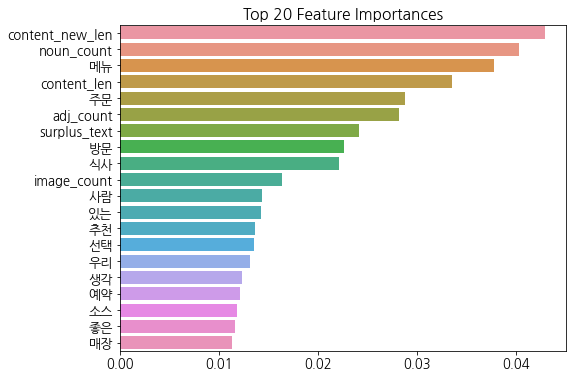

In [285]:
ftr_importances_values = clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = train_x.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

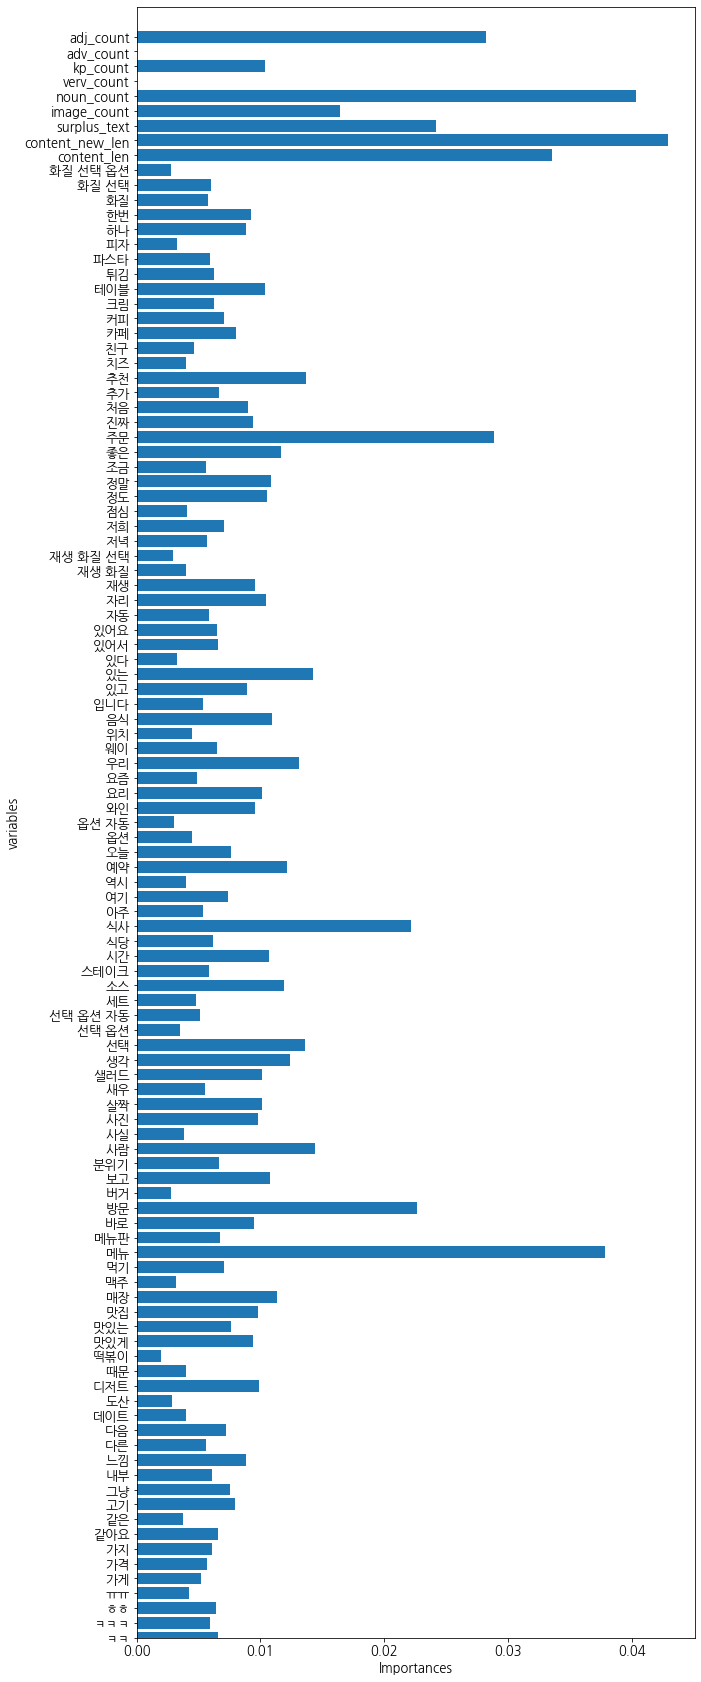

In [286]:
plt.figure(figsize=(10,30))
plt.rc('font', size=13) 
plt.barh(range(109), clf.feature_importances_, align='center')

plt.yticks(np.arange(109), data_scaling.drop('altificial',axis=1).columns)

plt.xlabel("Importances")
plt.ylabel("variables")
plt.ylim(0, 110)
plt.show()